In [78]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('C:/Users\Moin Dalvi\Documents\Data Science Material\Data Science\Python\Datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [73]:
x = data.drop('Outcome',axis=1)
y = data[['Outcome']]

In [76]:
# split data into train and test sets
seed = 3
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [79]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [81]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.41%


***Light GBM***

In [83]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [84]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [ ]:
clf = lgb.train(params, d_train, 100)

In [86]:
#Prediction
y_pred=clf.predict(x_test)

In [ ]:
predictions = [round(value) for value in y_pred]

In [87]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7440944881889764

#### Data Visualization to Demonstrate how boosting techniques works

In [27]:
x.shape[0]/2

384.0

Training Accuracy Score 0.7526041666666666
Testing Accuracy Score 0.7239583333333334


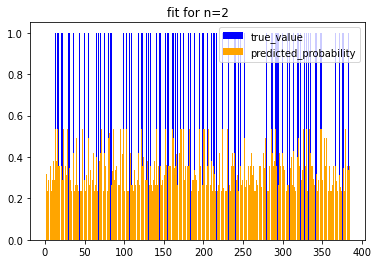

Training Accuracy Score 0.9322916666666666
Testing Accuracy Score 0.765625


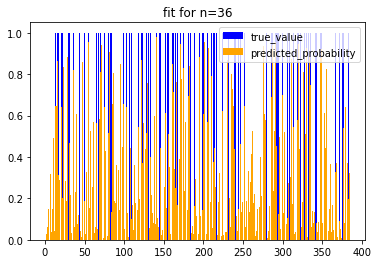

Training Accuracy Score 0.9921875
Testing Accuracy Score 0.7447916666666666


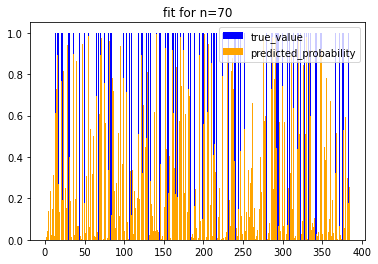

Training Accuracy Score 1.0
Testing Accuracy Score 0.7369791666666666


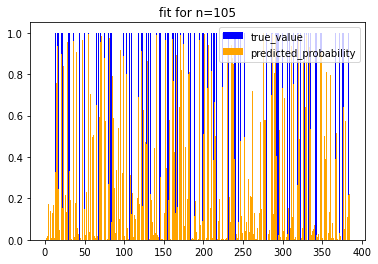

Training Accuracy Score 1.0
Testing Accuracy Score 0.7369791666666666


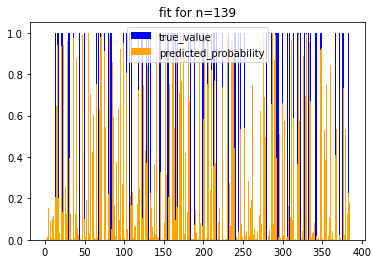

Training Accuracy Score 1.0
Testing Accuracy Score 0.7369791666666666


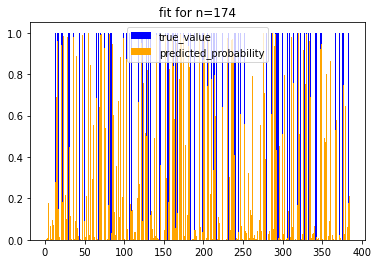

Training Accuracy Score 1.0
Testing Accuracy Score 0.71875


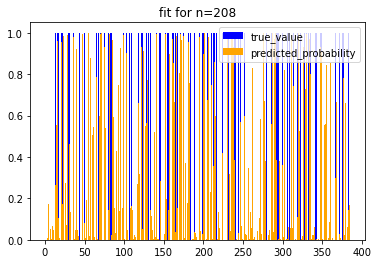

Training Accuracy Score 1.0
Testing Accuracy Score 0.7213541666666666


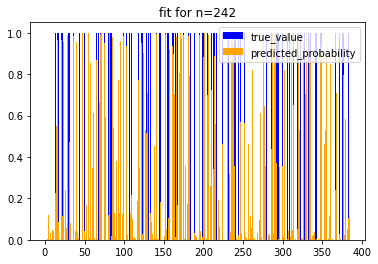

Training Accuracy Score 1.0
Testing Accuracy Score 0.7135416666666666


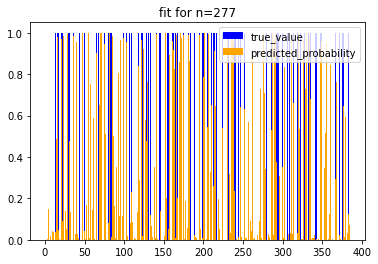

Training Accuracy Score 1.0
Testing Accuracy Score 0.7109375


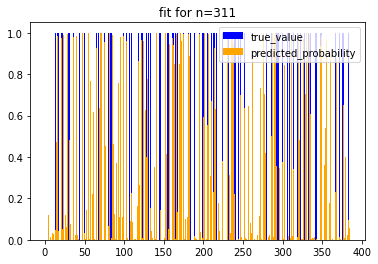

Training Accuracy Score 1.0
Testing Accuracy Score 0.7109375


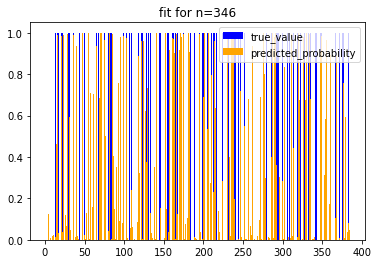

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


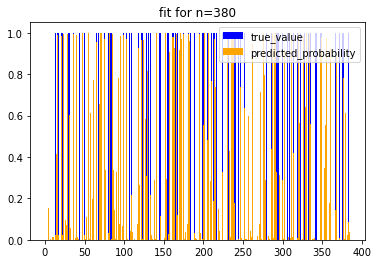

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


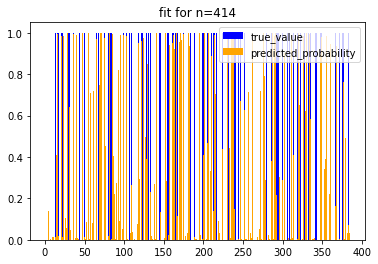

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


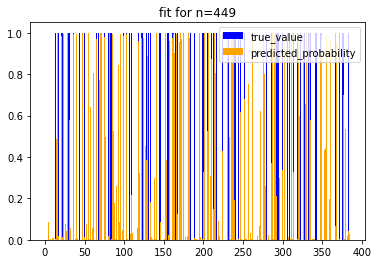

Training Accuracy Score 1.0
Testing Accuracy Score 0.7161458333333334


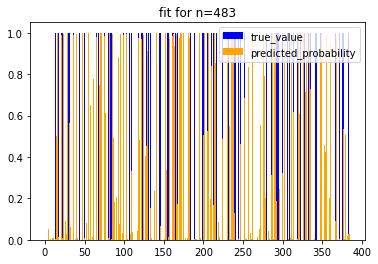

Training Accuracy Score 1.0
Testing Accuracy Score 0.7109375


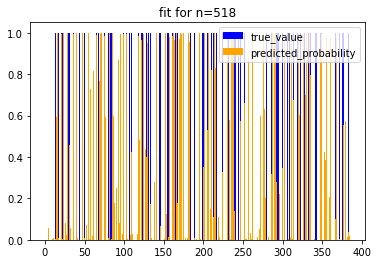

Training Accuracy Score 1.0
Testing Accuracy Score 0.7005208333333334


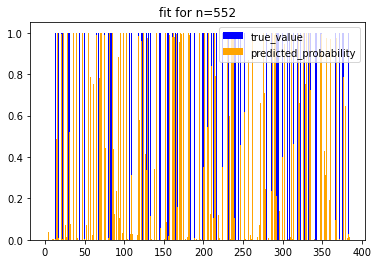

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


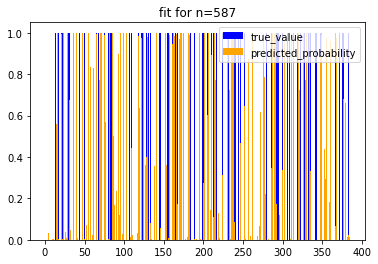

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


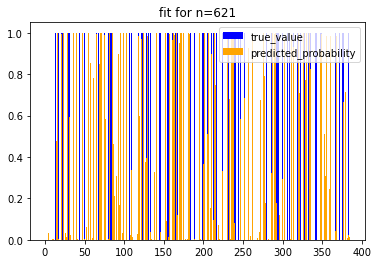

Training Accuracy Score 1.0
Testing Accuracy Score 0.7135416666666666


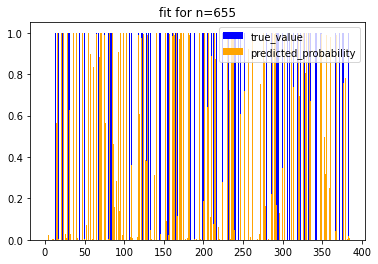

Training Accuracy Score 1.0
Testing Accuracy Score 0.7109375


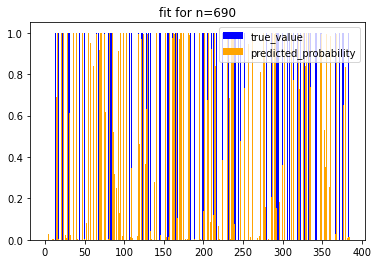

Training Accuracy Score 1.0
Testing Accuracy Score 0.7109375


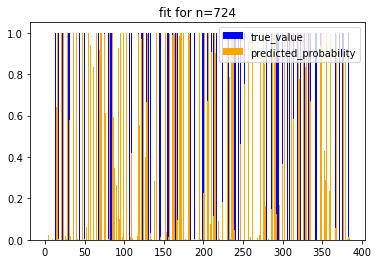

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


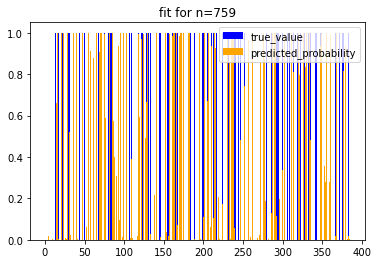

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


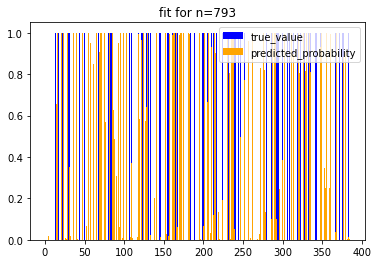

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


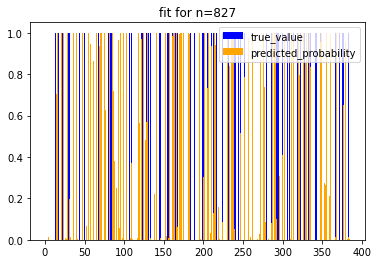

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


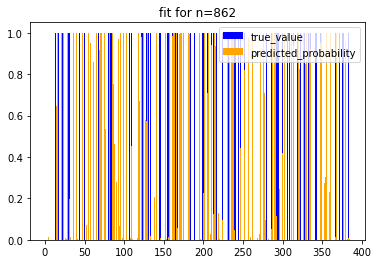

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


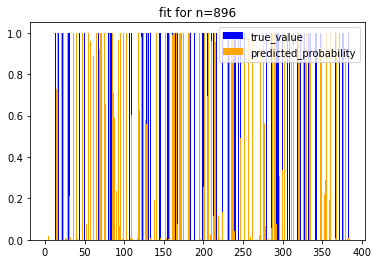

Training Accuracy Score 1.0
Testing Accuracy Score 0.7057291666666666


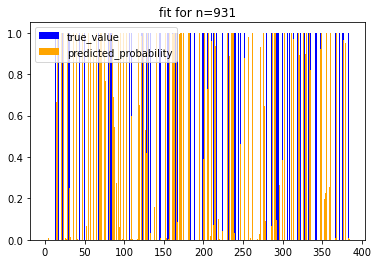

Training Accuracy Score 1.0
Testing Accuracy Score 0.7083333333333334


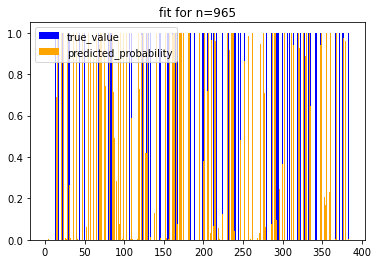

Training Accuracy Score 1.0
Testing Accuracy Score 0.7135416666666666


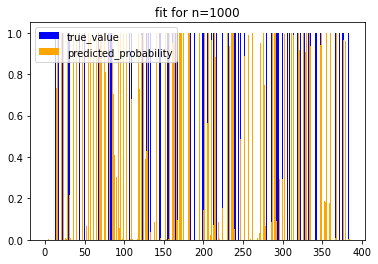

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], test_size= 0.5, shuffle = True, random_state=1)
for i in np.linspace(2,1000,30):
    model = GradientBoostingClassifier(n_estimators=np.int(i), learning_rate=0.2)
    model.fit(x_train,y_train)
    pred_train=pd.DataFrame()
    pred_test=pd.DataFrame()
    pred_train['train_Outcome'] = model.predict(x_train)
    pred_test['test_Outcome'] = model.predict(x_test)
    print('Training Accuracy Score', accuracy_score(y_train,pred_train))
    print('Testing Accuracy Score', accuracy_score(y_test,pred_test))
    #print('0 Class F1 Score', f1_score(y_test[y_test['Outcome']==0],pred_test[pred_test['test_Outcome']==0]))
    #print('1 Class F1 Score', f1_score(y_test[y_test['Outcome']==1],pred_test[pred_test['test_Outcome']==1]))
    plt.bar(np.arange(1,385), y_test, color='blue', label='true_value')
    plt.bar(np.arange(1,385)+0.2, model.predict_proba(x_test)[:,1], color='orange',label='predicted_probability')
    plt.bar(np.arange(1,385)+0.5, np.zeros(384))
    plt.title('fit for n='+str(int(i)))
    plt.legend(loc='best')
    plt.show()

In [13]:
data_x = np.linspace(1,1000,1000)
data_y = list(np.random.normal(1,.1,200))+list(np.random.normal(2,.1,200))+list(np.random.normal(3,.1,200))+list(np.random.normal(2,.1,200))+list(np.random.normal(1,.1,200))

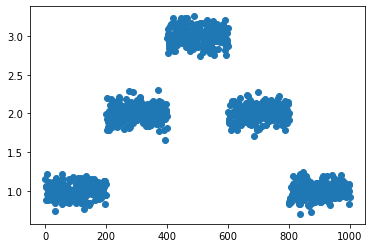

In [14]:
plt.scatter(pd.DataFrame(data_x), data_y)

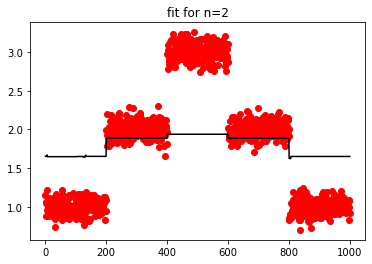

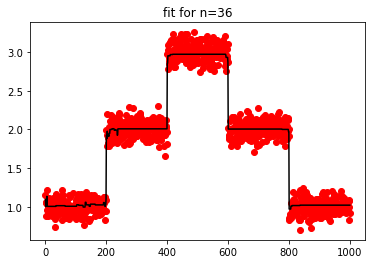

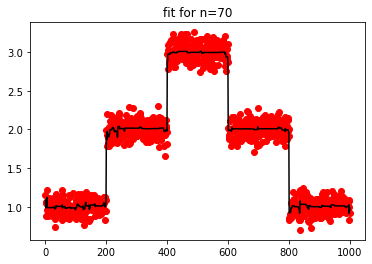

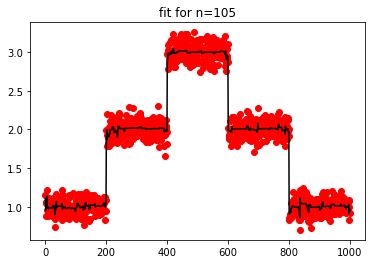

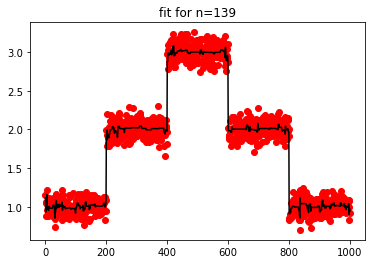

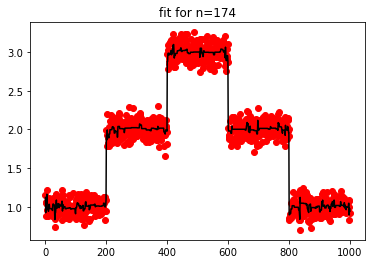

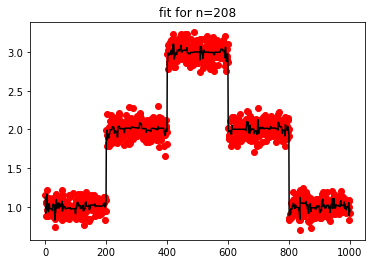

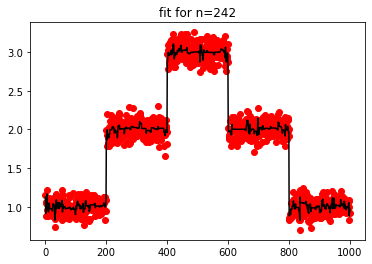

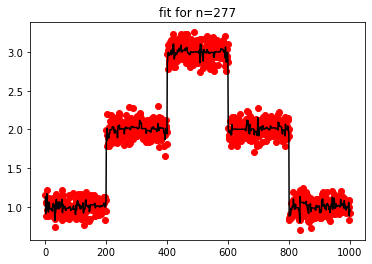

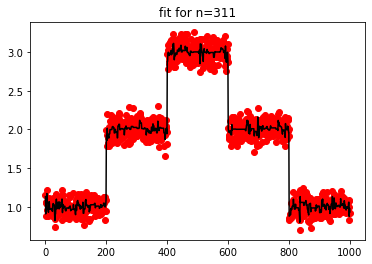

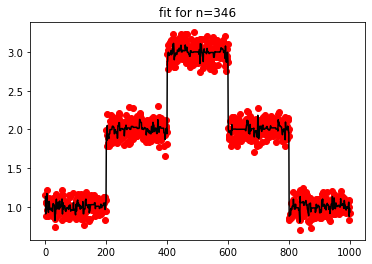

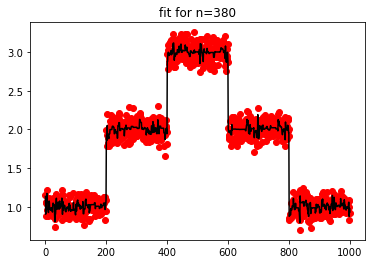

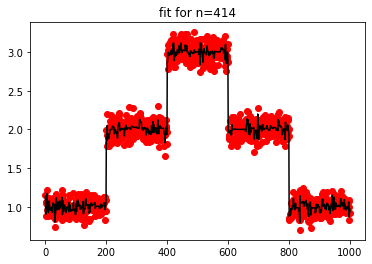

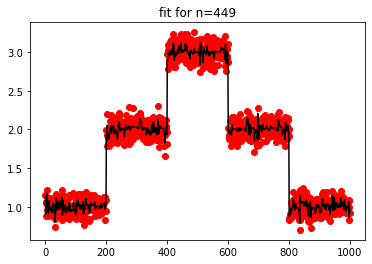

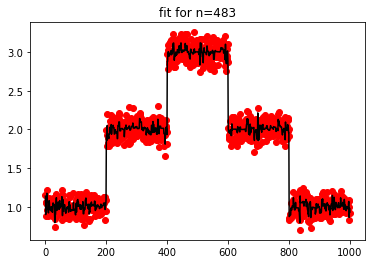

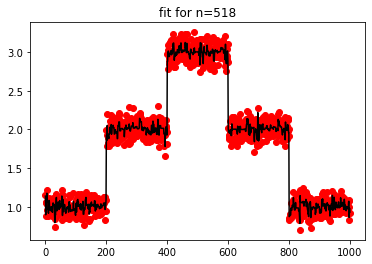

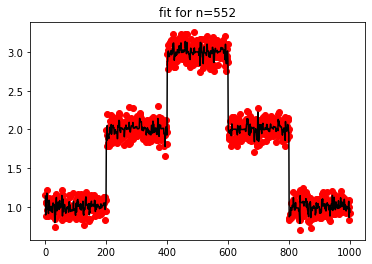

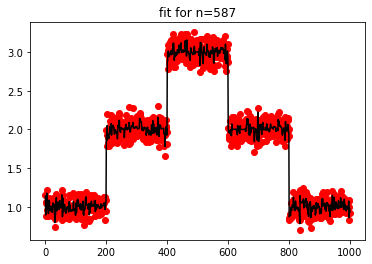

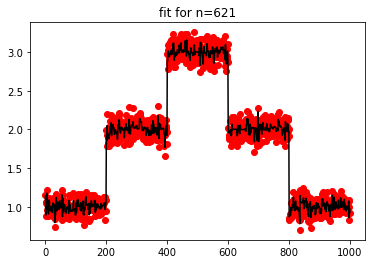

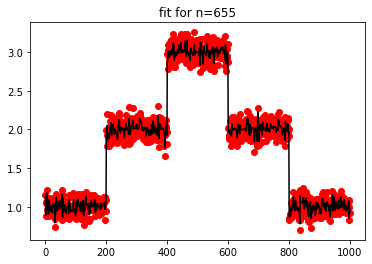

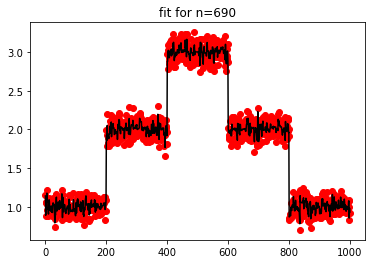

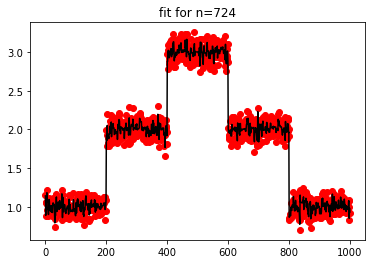

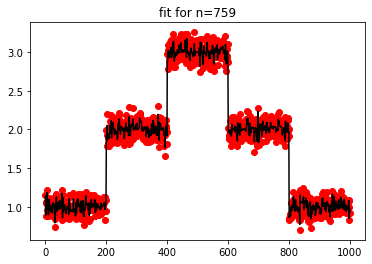

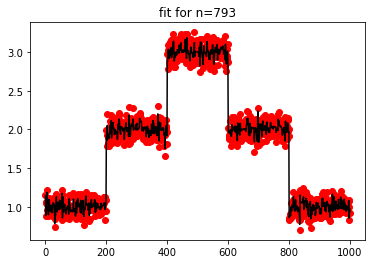

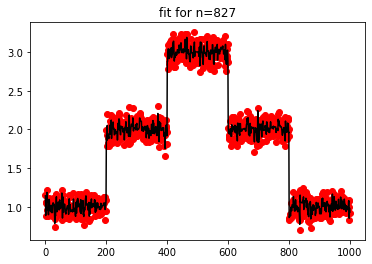

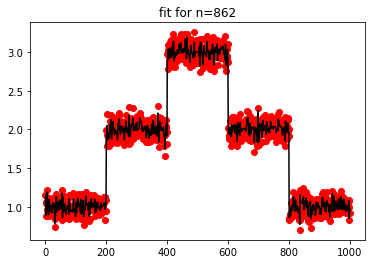

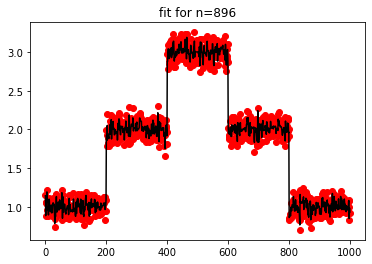

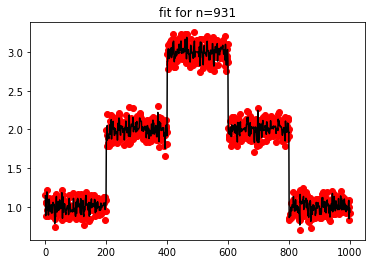

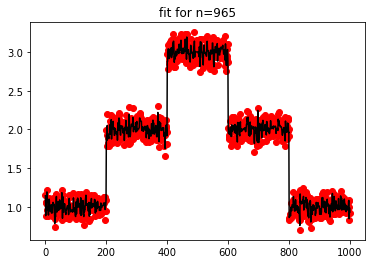

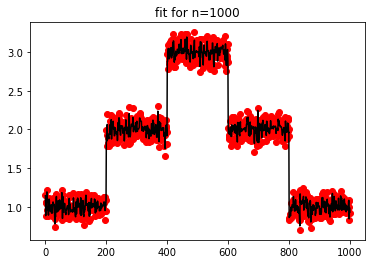

In [18]:
for i in np.linspace(2,1000,30):
    model = GradientBoostingRegressor(n_estimators=np.int(i))
    model.fit(data_x.reshape(-1, 1), data_y)
    plt.scatter(data_x,data_y,color='red')
    plt.plot(data_x, model.predict(data_x.reshape(-1, 1)),color='black')
    plt.title("fit for n="+str(int(i)))
    plt.show()